In [127]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [128]:
def normalize(data, lo, hi):
    return cv2.normalize(data, None, lo, hi, norm_type=cv2.NORM_MINMAX)

In [129]:
def imshow(image):
    image = normalize(image, 0, 255)
    plt.imshow(cv2.cvtColor(image.astype(np.uint8), cv2.COLOR_BGR2RGB))

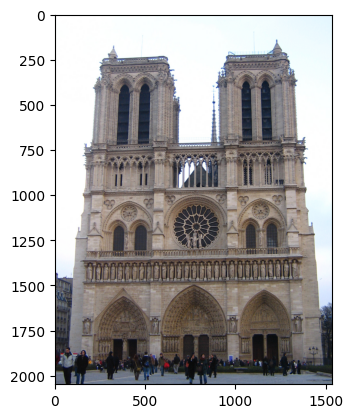

In [130]:
img_left = cv2.imread('1a_notredame.jpg')
imshow(img_left)

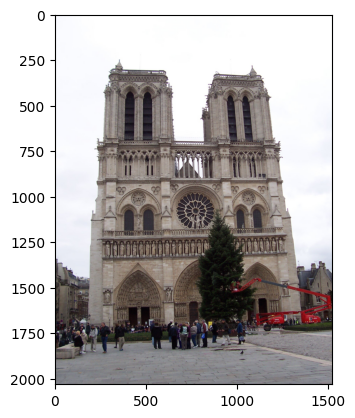

In [131]:
img_right = cv2.imread('1b_notredame.jpg')
imshow(img_right)

In [132]:
def sift_detect(image, n_keypoints):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create(n_keypoints, 5, sigma=5)
    kp, descriptor = sift.detectAndCompute(gray, None)
    points = np.array([k.pt for k in kp])
    return kp, points, descriptor

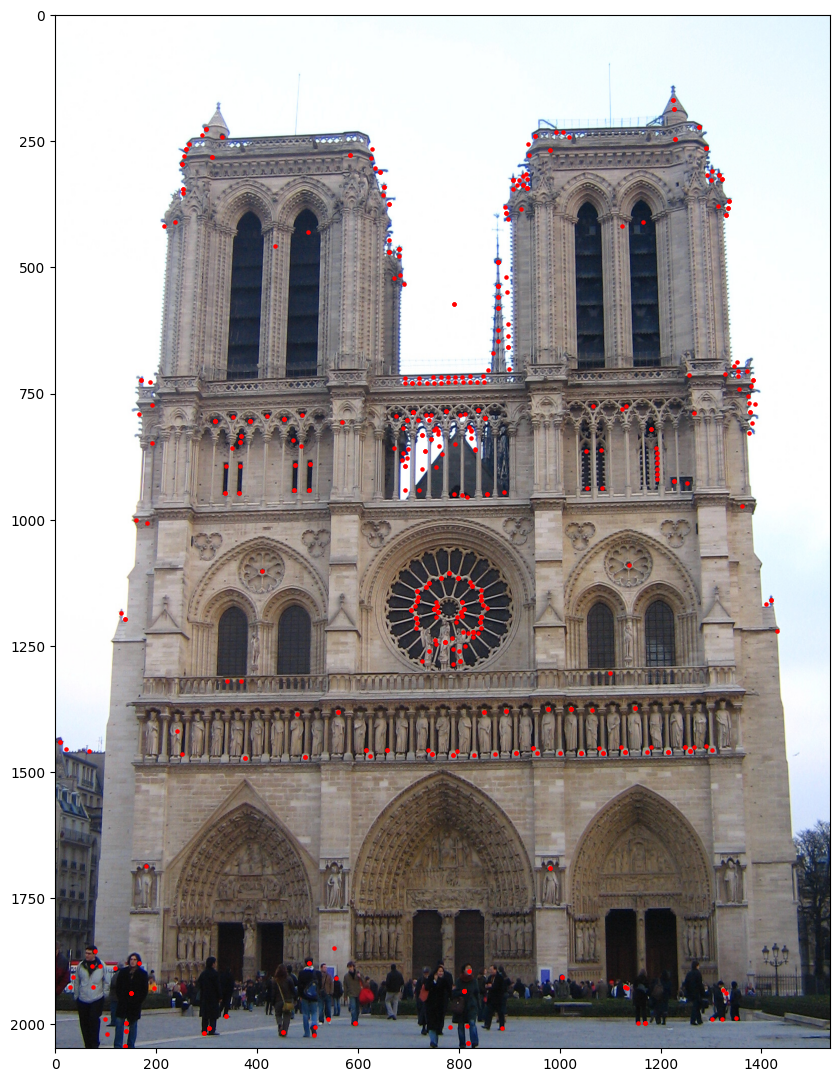

In [133]:
left_kp, left_point, left_desc = sift_detect(img_left, 500)
plt.figure(figsize=(10, 15))
imshow(img_left)
plt.scatter(left_point[:, 0], left_point[:, 1], c='r', s=5)

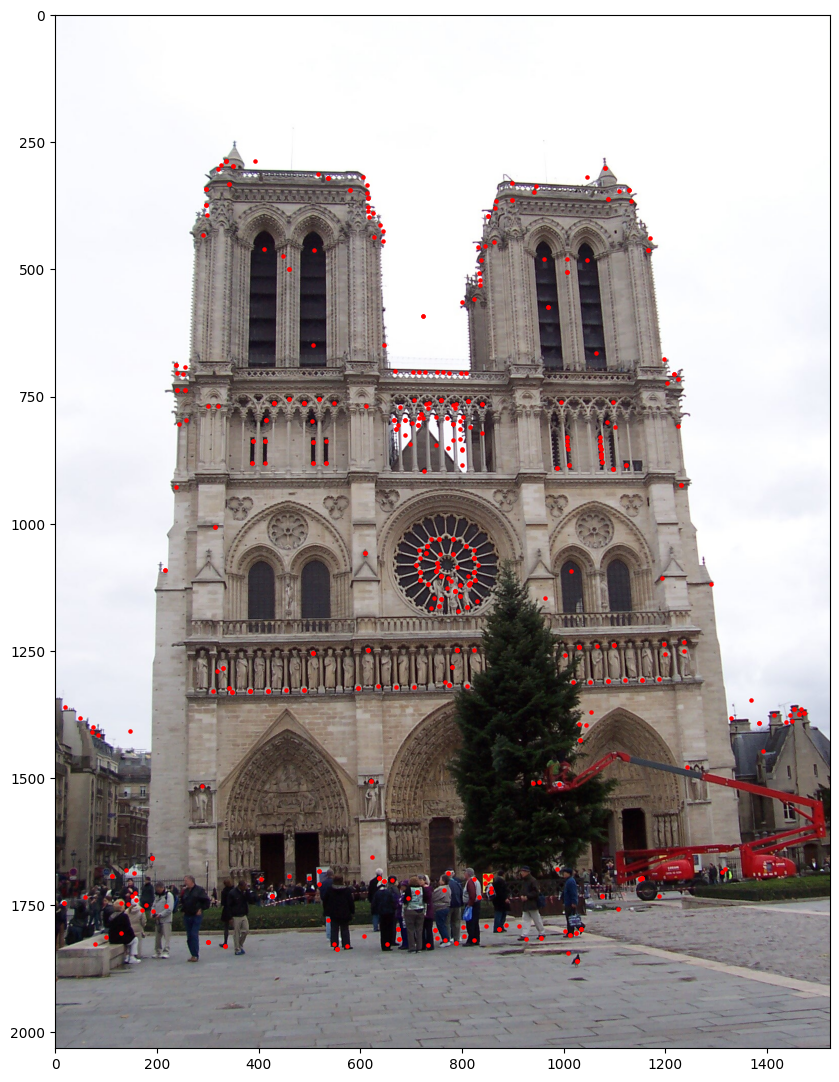

In [134]:
right_kp, right_point, right_desc = sift_detect(img_right, 500)
plt.figure(figsize=(10, 15))
imshow(img_right)
plt.scatter(right_point[:, 0], right_point[:, 1], c='r', s=5)

In [135]:
idx = []
for q, key in enumerate(left_desc):
    distance = np.linalg.norm(key - right_desc, axis=-1)
    sorted_idx = np.argsort(distance)
    for t0, t1 in zip(sorted_idx, sorted_idx[1:]):
        if distance[t0] < 400 and distance[t0] / distance[t1] < 0.7:
            idx.append([cv2.DMatch(q, t0, distance[t0])])
            print('accept: ', distance[t0], distance[t1])
            break

accept:  96.317184 316.70807
accept:  151.28781 318.27032
accept:  122.96341 176.15617
accept:  129.46428 246.21942
accept:  94.72064 146.4138
accept:  243.32693 366.6688
accept:  109.215385 293.89963
accept:  83.03614 137.9529
accept:  125.4472 200.21489
accept:  185.63135 282.1294
accept:  56.293873 110.63001
accept:  85.95929 130.34186
accept:  88.24965 132.12872
accept:  159.24509 360.07916
accept:  66.97761 119.61605
accept:  67.22351 112.08925
accept:  133.20285 275.4469
accept:  56.044624 86.94251
accept:  140.09639 329.7302
accept:  251.90474 361.62964
accept:  125.091965 300.44135
accept:  121.511314 298.07047
accept:  223.55089 327.03976
accept:  116.40017 312.80984
accept:  214.58798 314.0446
accept:  179.4185 285.52057
accept:  125.11994 244.52608
accept:  45.188496 101.779175
accept:  87.13208 168.35974
accept:  86.26703 162.40074
accept:  190.34442 276.98013
accept:  171.45262 333.1426
accept:  147.51949 294.8983
accept:  125.86104 342.52444
accept:  111.216 372.5829
acce

In [136]:
idx = np.array(idx)
idx

array([[< cv2.DMatch 0000026DE3342CB0>],
       [< cv2.DMatch 0000026DE336A6D0>],
       [< cv2.DMatch 0000026DE398B5B0>],
       [< cv2.DMatch 0000026DE3418830>],
       [< cv2.DMatch 0000026DE398BD70>],
       [< cv2.DMatch 0000026DE393CF70>],
       [< cv2.DMatch 0000026DE398BD10>],
       [< cv2.DMatch 0000026DE398BCF0>],
       [< cv2.DMatch 0000026DE398B390>],
       [< cv2.DMatch 0000026DE398B050>],
       [< cv2.DMatch 0000026DE398B190>],
       [< cv2.DMatch 0000026DE398B4D0>],
       [< cv2.DMatch 0000026DE398BCD0>],
       [< cv2.DMatch 0000026DE398BC70>],
       [< cv2.DMatch 0000026DE398BC30>],
       [< cv2.DMatch 0000026DE398BC10>],
       [< cv2.DMatch 0000026DE398B2F0>],
       [< cv2.DMatch 0000026DE398B470>],
       [< cv2.DMatch 0000026DE398BD90>],
       [< cv2.DMatch 0000026DE398BDB0>],
       [< cv2.DMatch 0000026DE398B430>],
       [< cv2.DMatch 0000026DE398BDF0>],
       [< cv2.DMatch 0000026DE398BCB0>],
       [< cv2.DMatch 0000026DE398BE10>],
       [< cv2.DM

In [137]:
img = cv2.drawMatchesKnn(img_left, left_kp, img_right, right_kp, idx, None,
                         flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

True

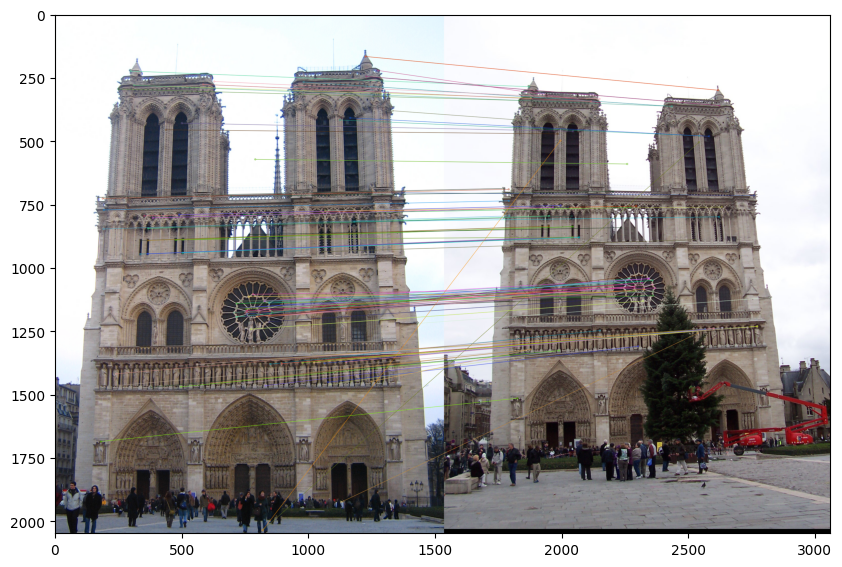

In [138]:
plt.figure(figsize=(10, 15))
imshow(img)
cv2.imwrite('test.jpg', img)